# Project: Ohio Climate Study

William Wang

21/10/2024

# Introduction (Thesis)



2020 witnessed a traumatic amount of flood invading the state of Ohio, causing casualty for hundreds of households within the central Columbus region. Newspapers and reports have investigated the cases of floods recorded within this year, in which one date stood out amongst the rest: the 20th of March 2020, when, per All Columbus Data, recorded “Storms developed over the early morning and trained across the same areas for several hours. 2″-4″ fell, with the heaviest totals focused along I-70. Flash flooding was common and some neighborhoods were flooded.”

This paper is designed to elaborate on the floods of 2020 in general and specifically the 20th of March. The paper will discuss an overview of floods situation during the aforementioned time marks, along with an analysis of its causations, casualties, prevention methods in order to derive a final conclusion for the future.

Our main question would be: How was Ohio’s flood situation for 2020 and what can we learn from it?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates


# Data and terms

## About the data

The data that have been collected are from The USGS (United States Geological Survey) and The National Weather Service (NWS) in the year 2020. The dataset consists of many different variables, but we are especially interested in discovering the following terms:

- Date and time: these are the dates that are covered within the data, ranging from 1-1-2020 to 12-31-2020.
- Discharge: The volume of water flowing through a river per second, measured in cubic feet per second (cfs).
- Gage Height: The height of the water surface above a reference point, indicating river levels and potential flooding.
- Precipitation: Any form of water falling from the atmosphere (rain, snow, sleet), measured in millimeters (mm) or inches.
- Temperature: A measure of atmospheric warmth or coldness, influencing weather and hydrology, expressed in degrees Celsius (°C) or Fahrenheit (°F).
- Snow Depth: The thickness of the snow cover on the ground, measured in centimeters (cm) or inches, important for water resource assessment and winter conditions.

The data provided was accurate and was collected directly from the main site, which solves the question of authenticity. The analysis of this data set is expected to produce insights into the situations of floods.

One disclaimer is that the dataset on gage height and discharge were on a 15-minute basis, whereas the others would be recorded on a daily basis.


## Cleaning and wrangling process

In order to combine the datasets and derive needed informations, we have done the following coding:

In [2]:

discharge_data = pd.read_csv('discharge_2020.csv')
gage_height_data = pd.read_csv('gage_height_2020.csv')
weather_data = pd.read_csv('weather_2020.csv')


discharge_data_clean = discharge_data[['datetime', '110247_00060']].copy()  # '110247_00060' is discharge

gage_height_data_clean = gage_height_data[['datetime', '110246_00065']].copy()  # '110246_00065' is gage height

discharge_data_clean['datetime'] = pd.to_datetime(discharge_data_clean['datetime'], errors='coerce')

# Convert datetime column to datetime format
gage_height_data_clean['datetime'] = pd.to_datetime(gage_height_data_clean['datetime'], errors='coerce')

discharge_data_clean = discharge_data_clean.dropna(subset=['datetime'])

gage_height_data_clean = gage_height_data_clean.dropna(subset=['datetime'])

# Convert Date column to datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')


weather_data = weather_data.dropna(subset=['Date'])

# Replace 'T' with a small number for Precipitation and Snow Depth
weather_data['Precipitation'] = weather_data['Precipitation'].replace('T', 0.001)

weather_data['Snow Depth'] = weather_data['Snow Depth'].replace('T', 0.001)


weather_data['Precipitation'] = pd.to_numeric(weather_data['Precipitation'], errors='coerce')

weather_data['Snow Depth'] = pd.to_numeric(weather_data['Snow Depth'], errors='coerce')

# Extract date from datetime columns
discharge_data_clean['Date'] = discharge_data_clean['datetime'].dt.date

gage_height_data_clean['Date'] = gage_height_data_clean['datetime'].dt.date

weather_data['Date'] = weather_data['Date'].dt.date

# Calculate daily average values
discharge_daily_avg = discharge_data_clean.groupby('Date')['110247_00060'].mean().reset_index()

gage_height_daily_avg = gage_height_data_clean.groupby('Date')['110246_00065'].mean().reset_index()


discharge_daily_avg.rename(columns={'110247_00060': 'Average_Discharge'}, inplace=True)

gage_height_daily_avg.rename(columns={'110246_00065': 'Average_Gage_Height'}, inplace=True)

# Merge the two dataframes
avg_merged_data = pd.merge(discharge_daily_avg, gage_height_daily_avg, on='Date', how='inner')

# Merge with weather data
final_data_avg = pd.merge(avg_merged_data, weather_data, on='Date', how='inner')


columns_to_drop = ['tz_cd', 'Departure', 'HDD', 'CDD', 'New Snow']  
avg_cleaned = final_data_avg.drop(columns=[col for col in columns_to_drop if col in final_data_avg.columns])


# Rename Maximum, Minimum, and Average columns in weather data to be more descriptive
avg_cleaned.rename(columns={
    'Maximum': 'Maximum_Temperature',
    'Minimum': 'Minimum_Temperature',
    'Average': 'Average_Temperature',
    'Snow Depth': 'Snow_Depth'
}, inplace=True)

# Display the cleaned and renamed dataframe
print(avg_cleaned.head())

         Date  Average_Discharge  Average_Gage_Height  Maximum_Temperature  \
0  2020-01-01         116.305435             4.027826                   44   
1  2020-01-02          82.548958             3.796875                   49   
2  2020-01-03         563.294792             6.108542                   52   
3  2020-01-04         585.968750             6.346354                   46   
4  2020-01-05         223.562500             4.715833                   41   

   Minimum_Temperature  Average_Temperature  Precipitation  Snow_Depth  
0                   32                 38.0           0.00         0.0  
1                   35                 42.0           0.10         0.0  
2                   46                 49.0           1.01         0.0  
3                   33                 39.5           0.02         0.0  
4                   31                 36.0           0.00         0.0  


Our code cleans and processes data from three datasets: discharge, gage height, and weather. The code was designed to do the following tasks: 

- Reading each dataset, selecting relevant columns, and converting date columns to a standard datetime format, handling errors by dropping rows with invalid dates. For weather data, trace amounts ('T') in Precipitation and Snow Depth are replaced with a small number (0.001) and converted to numeric format. 
- Date columns in discharge and gage height data are further simplified to contain only the date part, enabling daily aggregations. 
- Calculates daily averages for discharge and gage height, renaming these averaged columns descriptively. 
- Merges the daily averaged discharge and gage height data into a single dataframe based on the date and subsequently merges this result with the weather data, keeping only records with matching dates. 
- Additional columns irrelevant to analysis are removed from the final merged data, and certain columns (like Maximum, Minimum, and Average temperatures) are renamed for clarity. 

The final processed and cleaned dataframe as displayed, ready for further analysis.

In [3]:
discharge_data = pd.read_csv('discharge_2020.csv')
gage_height_data = pd.read_csv('gage_height_2020.csv')
weather_data = pd.read_csv('weather_2020.csv')


discharge_data_clean = discharge_data[['datetime', '110247_00060']].copy()  # '110247_00060' is discharge
gage_height_data_clean = gage_height_data[['datetime', '110246_00065']].copy()  # '110246_00065' is gage height

discharge_data_clean['datetime'] = pd.to_datetime(discharge_data_clean['datetime'], format='%Y/%m/%d %H:%M', errors='coerce')

gage_height_data_clean['datetime'] = pd.to_datetime(gage_height_data_clean['datetime'], format='%Y/%m/%d %H:%M', errors='coerce')

# Drop rows with NaN values
discharge_data_clean = discharge_data_clean.dropna(subset=['datetime'])
gage_height_data_clean = gage_height_data_clean.dropna(subset=['datetime'])

# Convert the weather 'Date' column to datetime format 
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%m/%d/%Y', errors='coerce')

# Drop invalid dates in weather data
weather_data = weather_data.dropna(subset=['Date'])

# Replace 'T' with a small number for both Precipitation and Snow Depth
weather_data['Precipitation'] = weather_data['Precipitation'].replace('T', 0.001)
weather_data['Snow Depth'] = weather_data['Snow Depth'].replace('T', 0.001)

# Convert Precipitation and Snow Depth to numeric values
weather_data['Precipitation'] = pd.to_numeric(weather_data['Precipitation'], errors='coerce')
weather_data['Snow Depth'] = pd.to_numeric(weather_data['Snow Depth'], errors='coerce')


discharge_data_clean['Date'] = discharge_data_clean['datetime'].dt.date

gage_height_data_clean['Date'] = gage_height_data_clean['datetime'].dt.date

weather_data['Date'] = weather_data['Date'].dt.date

# Calculate the daily maximum for discharge and gage height
discharge_daily_max = discharge_data_clean.groupby('Date')['110247_00060'].max().reset_index()
gage_height_daily_max = gage_height_data_clean.groupby('Date')['110246_00065'].max().reset_index()


discharge_daily_max.rename(columns={'110247_00060': 'Maximum_Discharge'}, inplace=True)

gage_height_daily_max.rename(columns={'110246_00065': 'Maximum_Gage_Height'}, inplace=True)


max_merged_data = pd.merge(discharge_daily_max, gage_height_daily_max, on='Date', how='inner')


final_data_max = pd.merge(max_merged_data, weather_data, on='Date', how='inner')


columns_to_drop = ['tz_cd', 'Departure', 'HDD', 'CDD', 'New Snow']  
max_cleaned = final_data_max.drop(columns=[col for col in columns_to_drop if col in final_data_max.columns])


max_cleaned.rename(columns={
    'Maximum': 'Maximum_Temperature',
    'Minimum': 'Minimum_Temperature',
    'Average': 'Average_Temperature',
    'Snow Depth': 'Snow_Depth'
}, inplace=True)


print(max_cleaned.head())


         Date  Maximum_Discharge  Maximum_Gage_Height  Maximum_Temperature  \
0  2020-01-01              145.0                 4.23                   44   
1  2020-01-02               96.3                 3.89                   49   
2  2020-01-03             1010.0                 7.99                   52   
3  2020-01-04              870.0                 7.48                   46   
4  2020-01-05              321.0                 5.23                   41   

   Minimum_Temperature  Average_Temperature  Precipitation  Snow_Depth  
0                   32                 38.0           0.00         0.0  
1                   35                 42.0           0.10         0.0  
2                   46                 49.0           1.01         0.0  
3                   33                 39.5           0.02         0.0  
4                   31                 36.0           0.00         0.0  


For this, the same work was done, but now our focus is on maximum values for discharge and gage heights.

# Overall analysis of year 2020

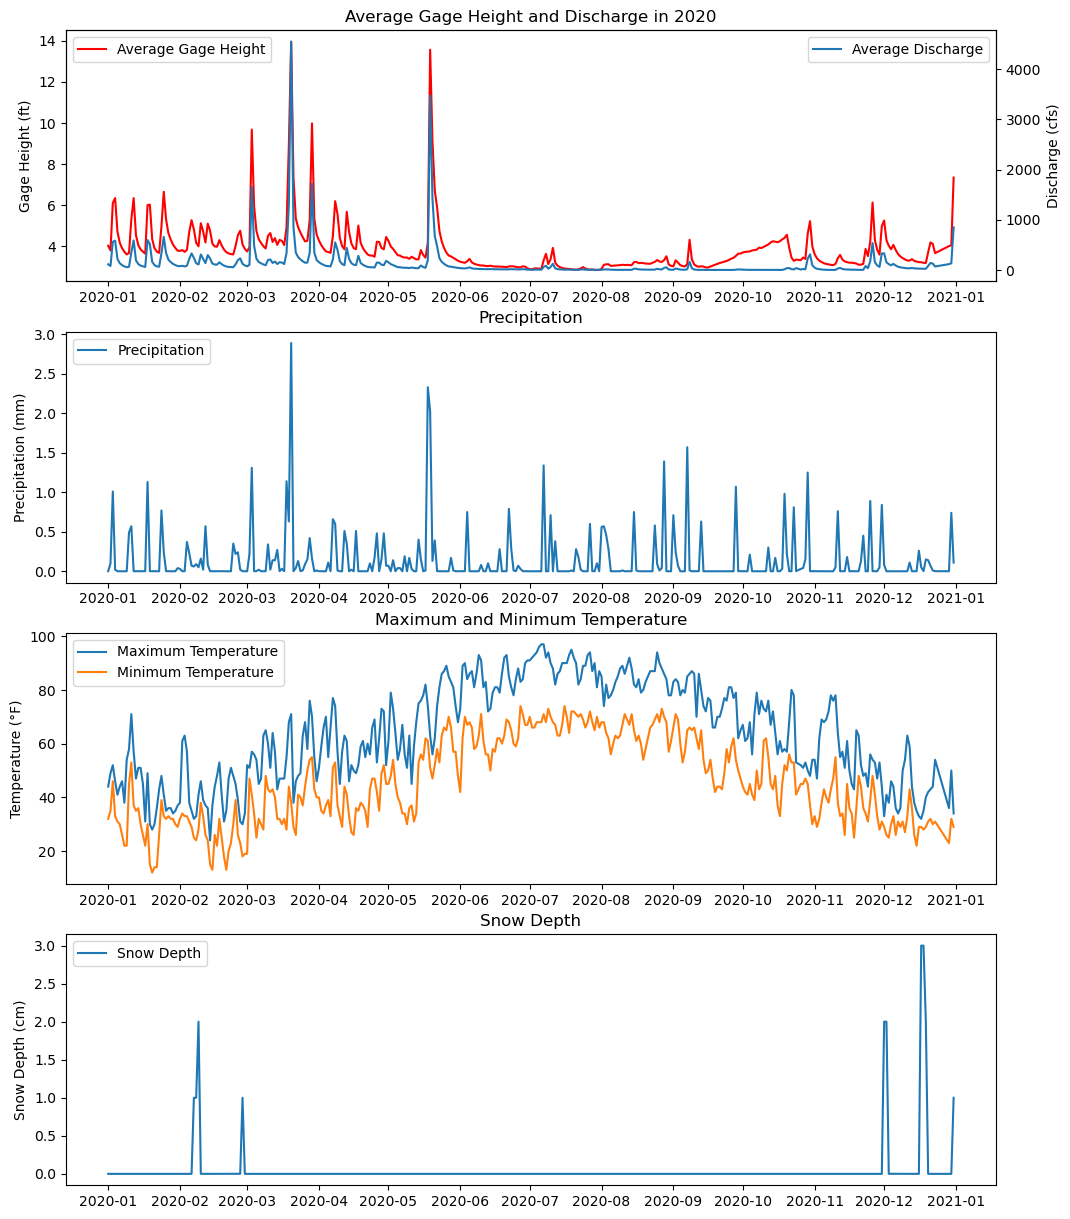

In [4]:
# Ensure the 'Date' column is in datetime format
avg_cleaned['Date'] = pd.to_datetime(avg_cleaned['Date'])

# Define start and end dates as datetime objects
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')

# Filter data between the start and end date
filtered_data = avg_cleaned[(avg_cleaned['Date'] >= start_date) & (avg_cleaned['Date'] <= end_date)]

# Create subplots (4 subplots)
fig, axs = plt.subplots(4, 1, figsize=(12, 15))

# Format the x-axis to show months
for i in axs:
    i.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
    i.xaxis.set_major_locator(mdates.MonthLocator())           

# Plot Average Gage Height and Average Discharge
y1 = axs[0]
y2 = y1.twinx()

y1.plot(filtered_data['Date'], filtered_data['Average_Gage_Height'], color='red', label='Average Gage Height')
y1.set_ylabel('Gage Height (ft)')
y1.set_title('Average Gage Height and Discharge in 2020')

y2.plot(filtered_data['Date'], filtered_data['Average_Discharge'], label='Average Discharge')
y2.set_ylabel('Discharge (cfs)')


y1.legend(loc='upper left')
y2.legend(loc='upper right')


precip = axs[1]
precip.plot(filtered_data['Date'], filtered_data['Precipitation'], label='Precipitation')
precip.set_title('Precipitation')
precip.set_ylabel('Precipitation (mm)')
precip.legend(loc='upper left')

# Plot Maximum and Minimum Temperature
temp = axs[2]
temp.plot(filtered_data['Date'], filtered_data['Maximum_Temperature'], label='Maximum Temperature')
temp.plot(filtered_data['Date'], filtered_data['Minimum_Temperature'], label='Minimum Temperature')
temp.set_ylabel('Temperature (°F)')
temp.set_title('Maximum and Minimum Temperature')
temp.legend(loc='upper left')

# Plot Snow Depth
snow = axs[3]
snow.plot(filtered_data['Date'], filtered_data['Snow_Depth'], label='Snow Depth')
snow.set_ylabel('Snow Depth (cm)')
snow.set_title('Snow Depth')
snow.legend(loc='upper left')

# Show the plot
plt.show()


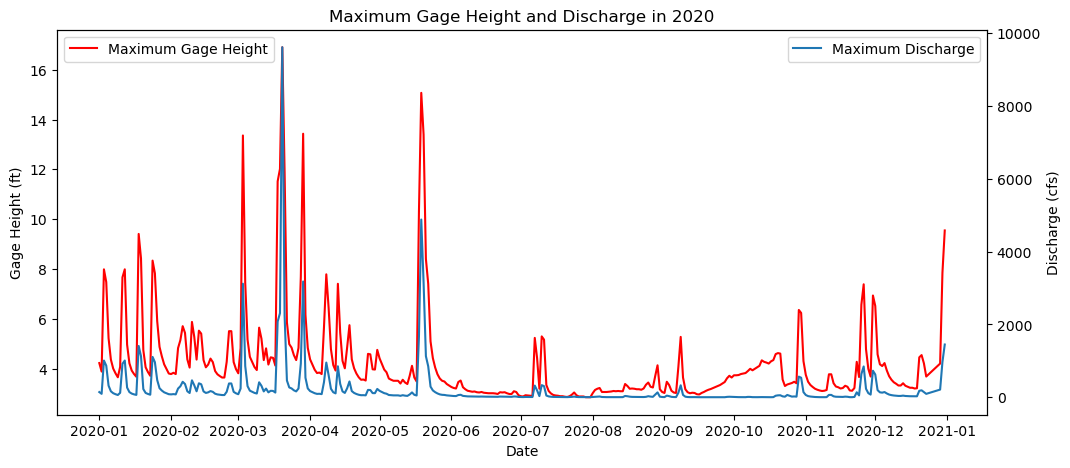

In [5]:
max_cleaned['Date'] = pd.to_datetime(max_cleaned['Date'])

# Define start and end dates as datetime objects
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')


filtered_data = max_cleaned[(max_cleaned['Date'] >= start_date) & (max_cleaned['Date'] <= end_date)]


fig, y1 = plt.subplots(figsize=(12, 5))

# Formatting the x-axis to show dates properly
y1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
y1.xaxis.set_major_locator(mdates.MonthLocator())  # Show every 5th day for better readability

# Plot Maximum Gage Height on the first y-axis
y1.plot(filtered_data['Date'], filtered_data['Maximum_Gage_Height'], color='red', label='Maximum Gage Height')
y1.set_ylabel('Gage Height (ft)')  # Unit: feet

# Plot Maximum Discharge on the second y-axis
y2 = y1.twinx() 
y2.plot(filtered_data['Date'], filtered_data['Maximum_Discharge'], label='Maximum Discharge')
y2.set_ylabel('Discharge (cfs)')  # Unit: cubic feet per second (cfs)

# Add titles and labels
y1.set_title('Maximum Gage Height and Discharge in 2020')
y1.set_xlabel('Date')

# Add legends for both axes
y1.legend(loc='upper left')
y2.legend(loc='upper right')

# Display the plot
plt.show()

## Gage height and discharge

### Maximum values
The graph above demonstrates the maximum gage height and discharge. Only from this graph, we could understand the trends for rains or floods within a year. From this graph, it is clear that most of the floods tend to occur within the first and last few months, with a peak at 16 feet gage height in the months of March and was surrounded by a lot of high signs of gage heights. This shows that during these months, the level of water within rivers rises high and is one of the main reasons for floods. Furthermore, another indicator - Discharge tells us that in the months of high river water levels, the floods also flows intensely, leading to heavier damage which we will discuss later on. This initial graph gives us a glimpse of how flood situations have been during the year 2020, along with the relationship between gage height and discharge - these two variables are closely correlated with each other, and will become a strong indicator of floods.

### Average values

First and foremost, as we compare the graphs for maximum versus average gage height and discharge, we discover that the two graphs resemble close similarities, indicating that the exploration of average floods supports the main graph.

With the peak of the graph also falling in March at around 14 feet gage height and 4000 cfs discharge, it is understandable that one of the most devastating floods was in March. The graph also shed light on the total situation of floods in 2020 much better than the maximum graph.

The year 2020 started rather rough, with the few first month received an increasingly high amount of precipitation and floods, peaking in March where the most amount of precipitation was recorded. The following 6 months was rather stable, receiving a decent amount of rain but not significant gage height and discharge recorded. The year ended with continous high amounts of discharge and gage height, indicating that there might be several small floods in Ohio.

## Relationship with other variables

Now, as the question is more expanded, let’s dive deeper into how each complementary graphs expand our understanding of what causes floods. 

### Precipitation

Further investigation shows a correlation between precipitation and the two main variables. This is actually explainable since with a higher rate of rainfall, we do expect the floods to come in afterwards. This is particularly true in this case since the highest precipitation also happens to be in March, colliding with the gage height and discharge.

### Snow depth

We could also base this to look at the snow depth, according to Floodflash: “Melting snow can contribute significant amounts of water to rivers, as well as making the ground more saturated – these both contribute to a higher likelihood of flooding.
If there’s more water than the ground can take, or the water overwhelms rivers, then flooding occurs.” Typically, a higher snow depth would appear a few days before the flood, which explains why there is a slight shift in snow amounts in March, marking an upcoming flood. However, the amount of snow recorded isn't indicating any contribution to the amount of floods. Rather, we can see this as more of a way to warn about upcoming floods, since the snow tends to pile up before a large amount of rain.

## Conclusion for 2020

All in all, 2020 was recorded as a year with many disastrous activities “The billion-dollar events of 2020 included a record 7 disasters linked to tropical cyclones, 13 to severe storms, 1 to drought, and 1 to wildfires. The 22 events cost the nation a combined $95 billion in damages.”(Climate.gov, 2021.) And this would explain the amount of precipitation which caused an increase in the amount of flood.

Besides from such, the floods in the Ohio region are particularly caused by the folowing reasons:

- High River and Soil Saturation: By early spring, many rivers were already swollen from previous rainfall, and the ground was saturated. Ohio’s flat or low-lying areas are prone to flooding under these conditions, as water has limited places to drain.

- Urbanization and Infrastructure: With increased development, urban areas in Ohio have more paved surfaces, which means less ground to absorb rainfall. This runoff can overwhelm drainage systems and increase the likelihood of flash flooding in populated areas.

- Climate Change Effects: While no single event can be entirely attributed to climate change, increasing temperatures are linked to more intense rainfall events. Warmer air holds more moisture, potentially leading to heavier downpours and, consequently, more frequent or severe flooding.


# 20th of March - Wrath of Poseidon

During our research, one day seems to be mentioned rather frequently - the 20th of March - where floods were featured on numerous first pages of Newark newspapers, deputy officers called in for emergencies, and data points skyrocketed. This day featured flash floods, building destructions and even death. This part will lay an emphasis on how different articles online have discussed this day compared to the data that was provided.

“Heavy rain also caused flooding in parts of Ohio, in particular in areas around Columbus. NWS Wilmington, Ohio, said that Columbus set a record for rainfall for the date 20 March, recording 2.88 inches (73.15mm), breaking the previous record of 1.6 inches (40.64mm) set in 1984.”(Floodlist, 2020) The flood on the date 20th March was infamously known for its record - breaking numbers and devastating impact on people’s lives. Let us look at the statistics and observe this phenomenon’s causes.

![Poseidon](poseidon.jpg)

*Poseidon by Mythologian.net*


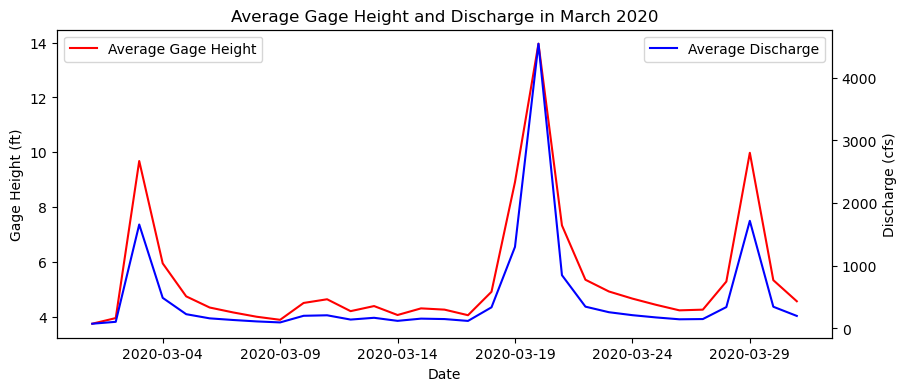

In [6]:
# Ensure the 'Date' column is in datetime format
avg_cleaned['Date'] = pd.to_datetime(avg_cleaned['Date'])

# Filter data using the .between() method for March 2020
filtered_data_march = avg_cleaned[avg_cleaned['Date'].between('2020-03-01', '2020-03-31')]

# Create a plot with dual y-axes
fig, y1 = plt.subplots(figsize=(10, 4))

# Formatting the x-axis to show dates properly
y1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
y1.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show every 5th day for better readability

# Plot Average Gage Height on the first y-axis
y1.plot(filtered_data_march['Date'], filtered_data_march['Average_Gage_Height'], color='red', label='Average Gage Height')
y1.set_ylabel('Gage Height (ft)')  # Unit: feet

# Plot Average Discharge on the second y-axis
y2 = y1.twinx() 
y2.plot(filtered_data_march['Date'], filtered_data_march['Average_Discharge'], label='Average Discharge', color='blue')
y2.set_ylabel('Discharge (cfs)')  # Unit: cubic feet per second (cfs)

# Add titles and labels
y1.set_title('Average Gage Height and Discharge in March 2020')
y1.set_xlabel('Date')

# Add legends for both axes
y1.legend(loc='upper left')
y2.legend(loc='upper right')

# Display the plot
plt.show()


## The build - up

Before uncovering the destined day of 20th of March, it would be helpful to take a quick look of what was going on during the month of March, where the amount of rain spiked abnormally.

### Average gage height and discharge
As we narrow it down to just March, it is observable that the peak gage height for the month was 17.5 feet - this is the time when gage height reached the highest level for the whole year. Compared to the usual gage height of only around 4 to 6 feet, it is evident that on this day, a huge flood hits the center of Ohio. Discharge, nonetheless, peaked at the same time as gage height at 4000 cfs, indicating that with a high water level, the flows become just as deadly, and is expected to cause a destructive impact.

First of all, precipitation is the deciding factor as it contributes directly to the amount of downpour that could result in flash floods and related issues. And so, we observe that precipitation had a correlation with gage height and discharge. 

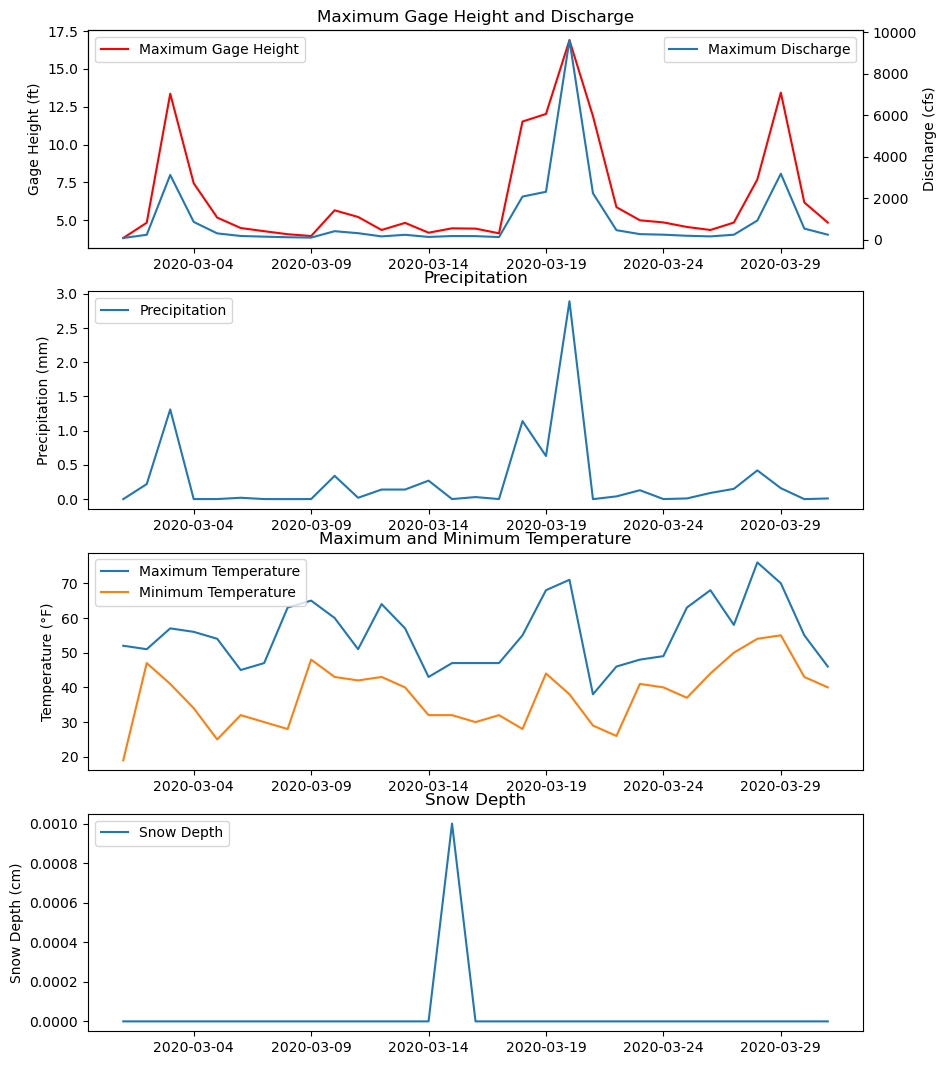

In [7]:
# Period - March
max_cleaned['Date'] = pd.to_datetime(max_cleaned['Date'])

# Filter data using the .between() method for March 2020
filtered_data = max_cleaned[max_cleaned['Date'].between('2020-03-01', '2020-03-31')]

fig, axs = plt.subplots(4, 1,figsize=(10, 13))

# Formatting the x-axis
for i in axs:
    i.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    i.xaxis.set_major_locator(mdates.DayLocator(interval=5))  

# Plot Maximum Gage Height and Discharge
y1 = axs[0]
y2 = y1.twinx()


y1.plot(filtered_data['Date'], filtered_data['Maximum_Gage_Height'], color='red', label='Maximum Gage Height')
y1.set_ylabel('Gage Height (ft)') 

y2.plot(filtered_data['Date'], filtered_data['Maximum_Discharge'], label='Maximum Discharge')
y2.set_ylabel('Discharge (cfs)')  

y1.set_title('Maximum Gage Height and Discharge')
y1.legend(loc='upper left')
y2.legend(loc='upper right')

# Plot Precipitation
precip = axs[1]
precip.plot(filtered_data['Date'], filtered_data['Precipitation'], label='Precipitation')
precip.set_title('Precipitation')
precip.set_ylabel('Precipitation (mm)')
precip.legend(loc='upper left')

# Plot Temperature
temp = axs[2]
temp.plot(filtered_data['Date'], filtered_data['Maximum_Temperature'], label='Maximum Temperature')
temp.plot(filtered_data['Date'], filtered_data['Minimum_Temperature'], label='Minimum Temperature')
temp.set_ylabel('Temperature (°F)')
temp.set_title('Maximum and Minimum Temperature')
temp.legend(loc='upper left')

# Plot Snow Depth
snow = axs[3]
snow.plot(filtered_data['Date'], filtered_data['Snow_Depth'], label='Snow Depth')
snow.set_ylabel('Snow Depth (cm)')
snow.set_title('Snow Depth')
snow.legend(loc='upper left')



plt.show()


### Maximum values and precipitation
On March 20th, the amount of precipitation increased rapidly to a surprising amount of 3mm per inch, making it the wettest day Ohio has ever experienced. And so, if any measurements were to be made, they would be expected to be carried out as soon as the rain starts pouring down. 

Understanding this precipitation leads to a bigger picture of maximum values of gage height and discharge. In the month of March when rain started pouring down much harder than the other months. There was a slight rise in precipitation in the day before it started pouring down on the destined day of 20th, which leads to a conspiracy of us that there might be a sign in precipitation that indicated a bigger rain coming afterwards.

### Other findings

There is also a small coincidence that before the flood starts coming in, the snow depth one day before that rose to a surprising amount of 0.0010 cm, which is surprising since snow isn’t observable on any day of that month. This led to a belief that snow might also be predictive of an upcoming flood.

Surprisingly, there isn’t much correlation between this whole theory and temperature, since this factor tends to not show any trend in correlation with other variables.

## The destined day

The flood was regarded as if it was a great battle between the human and the forces of nature, and now, to finally unveal that battle, let's look at how the timeline was laid out.

In [8]:

discharge = pd.read_csv('discharge_2020.csv')
gage_height = pd.read_csv('gage_height_2020.csv')


discharge_data_clean = discharge[['datetime', 'tz_cd', '110247_00060']].copy()  # '110247_00060' is discharge
gage_height_data_clean = gage_height[['datetime', 'tz_cd', '110246_00065']].copy()  # '110246_00065' is gage height

# Combine 'datetime' and 'tz_cd' to create full datetime 
discharge_data_clean['full_datetime'] = pd.to_datetime(discharge_data_clean['datetime'] + ' ' + discharge_data_clean['tz_cd'])
gage_height_data_clean['full_datetime'] = pd.to_datetime(gage_height_data_clean['datetime'] + ' ' + gage_height_data_clean['tz_cd'])

# Filter the data for March 20, 2020, from 00:00 to 23:45
start_time = pd.to_datetime('2020-03-20 00:00:00')
end_time = pd.to_datetime('2020-03-20 23:45:00')

# Filter the rows based on full datetime range
discharge_filtered = discharge_data_clean[(discharge_data_clean['full_datetime'] >= start_time) & (discharge_data_clean['full_datetime'] <= end_time)]
gage_height_filtered = gage_height_data_clean[(gage_height_data_clean['full_datetime'] >= start_time) & (gage_height_data_clean['full_datetime'] <= end_time)]

# Merge the filtered dataframes 
final_data = pd.merge(discharge_filtered, gage_height_filtered, on='full_datetime', how='inner', suffixes=('_discharge', '_gage_height'))


final_data = final_data[['full_datetime', '110247_00060', '110246_00065']]


print(final_data.head())

        full_datetime  110247_00060  110246_00065
0 2020-03-20 00:00:00        1540.0          9.88
1 2020-03-20 00:15:00        1580.0         10.00
2 2020-03-20 00:30:00        1610.0         10.12
3 2020-03-20 00:45:00        1620.0         10.14
4 2020-03-20 01:00:00        1650.0         10.25


### Data combination

In order to analyze this completely and perfectly, we had to recreate the data set designated for the day 20th of March. In this case, the code was able to do the following:

- Read the data sets and extract the needed informations which are datetime, tz_cd and the gage height as well as discharge values. This is needed since we will only be working with one date.
- Combine the datetime and hours and minutes to create a full timeline of that one day.
- Choose only the date that was required which is 20th of March.
- Finally, it merges everything together to create a fully working timeline consisting of gage height and discharge value.

The final product is a dataset designated for the mentioned date, as well as the variables related to flood ready to be fully analyzed.

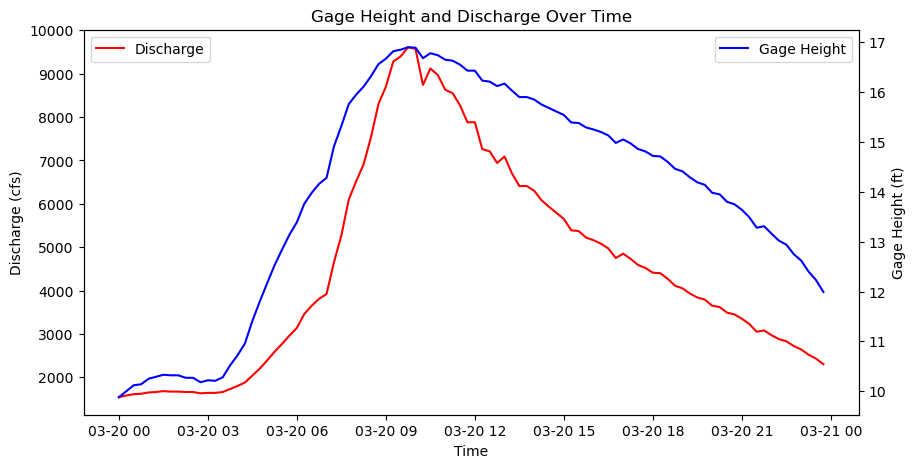

In [9]:

fig, y1 = plt.subplots(figsize=(10,5))

# Create a second y-axis that shares the same x-axis
y2 = y1.twinx()

# Plot Discharge on the first y-axis 
y1.plot(final_data['full_datetime'], final_data['110247_00060'], color='red', label='Discharge')
y1.set_ylabel('Discharge (cfs)')


# Plot Gage Height on the second y-axis
y2.plot(final_data['full_datetime'], final_data['110246_00065'], color = 'blue', label='Gage Height')
y2.set_ylabel('Gage Height (ft)')



y1.set_title('Gage Height and Discharge Over Time')
y1.set_xlabel('Time')

y1.legend(loc='upper left')
y2.legend(loc='upper right')

# Show the plot
plt.show()

### The main timeline

The event took place on March 20th, where the central Columbus region witnessed an absurd surge in the amount of rain they received. Following this, the gage height and discharge rose exponentially, creating the phenomenon called flash flood.

- From 00:00 to around 3:00 AM in the morning: during the sleeps of the citizens, rain has already started pouring down, as can be seen in the graph with a slight increase in the amount of gage height. However, this was not enough to alert the people of what is coming as one of the most destructive catastrophe in the region.

- 4:00 to around 8:00 AM: this is when the battle started, when the infographic demonstrated a sudden surge in the amount of gage height and discharge, both increasing at an insane rate, alerting authorities and citizens in the region.

- 9:00 to around 10:00 AM: the peak of the floods, numerous flash floods invaded the region from Columbus to Newark. Flood was recorded to have destroyed roads, buildings, constructions,... Citizens are now informed to leave their place immmediately to escape from the catastrophe. The peak amount of discharge is at 9610 cfs.

- After 9:00 to around 18:00 PM: Rain has stopped, however, the amount of water left by the flood was still present. This is when the heroes - police and firefighters, come to rescue. The main event to happen here is evacuations were proceeded, and restoration as well as temporary accommodation is provided to those who were damaged during the event.

The battle ended at around 21:00 PM, when rain fully stopped and sewage systems were restored. This marked the end of one of the biggest floods in the history of Ohio, leaving many without houses, and even took away lives.

# Casualties and impacts

## Properties damage

The damages of this event were recorded on numerous news pages and blogs which are as followed:

- “Almost 30 roads were closed in central parts of the state after flooding or landslides, according to the Ohio Department of Transport... The South Fork of Licking River near Buckeye Lake reached record levels of 881.89 feet on 20 March.”(Floodlist, 2020), 

- "A portion of Route 79 in Licking County south of Newark at Mile Marker 9 collapsed due to heavy runoff from a culvert and was closed in both directions."(NBC4,2020)

The 2020 floods in Ohio highlighted the need for improved flood management and preparedness for extreme weather events, stressing timely emergency response systems. To enhance infrastructure resilience, roads and bridges must be reinforced to withstand heavy runoff, and drainage systems like culverts require upgrades to prevent failures that led to road collapses. Future development should incorporate risk assessments and climate impact studies to inform planning, while increased funding is essential for long-term improvements and flood mitigation measures, as current systems proved inadequate during the flooding.

![route_79](converted_image.jpeg)

*Route 79 collapsing due to heavy flood (by NBC4i.com)*


## Humanitary casualties

- "Local media reported that 2 motorists in Harrison and Tuscarawas counties lost their lives after driving into flood waters. Around 40 people evacuated their homes in Franklin Township, near Columbus. Others had to be rescued from flooded areas south of Columbus. Evacuations and flood rescues were also carried out in Heath and Newark in Licking County."(Floodlist, 2020)

The event underscored the critical need for public awareness regarding the dangers of floodwaters, particularly the risks associated with driving in flooded areas. The necessity for effective emergency response plans became evident, as many residents faced evacuation and rescue due to the rising waters. These events highlight the importance of improving communication and preparedness efforts in communities prone to flooding, ensuring that residents are informed about risks and know how to respond in emergencies. Strengthening community resilience through better planning and resource allocation is essential to protect lives in future flooding events.

All in all, the reports proved that there are still many drawbacks with the way the region handles the flood, and the impact of the flood is a warning to the people that we are very vulnerable, and that many improvements has to be done.


# Conclusion

In conclusion, the 2020 flood data underscores the significant impact of natural variables on flooding and the challenges in predicting these events. With data pointing to intense rainfall and rapidly rising river levels as key drivers of flooding, particularly in March, it’s evident that floods can develop quickly and lead to widespread damage. The flooding events in Ohio, especially on March 20th, exemplify the devastating effects, with records showing the highest gage height and discharge levels of the year, causing road closures, property damage, and even fatalities.

However, predicting such events remains complex, as various factors—precipitation, snow depth, and river flow—interact in unpredictable ways. While rainfall and snowmelt are primary indicators, the lack of correlation with temperature further complicates forecasting efforts. This uncertainty highlights the need for responsive flood management systems and timely rescues. In cases like March 20th, quick mobilization of emergency services proved crucial in protecting lives. Therefore, enhancing predictive models, preparing for rapid response, and implementing preventative infrastructure in flood-prone areas will be essential to mitigate future flood impacts effectively.


# Works Cited

1. FloodList News. (2020, March 23). USA – 8 killed in Ohio and Indiana floods. https://floodlist.com/america/usa/ohio-indiana-floods-march-2020
2. All Columbus Data. (2024, September 27). Columbus flood History - All Columbus data. https://allcolumbusdata.com/columbus-ohio-weather-history/columbus-flood-history/
3. Hume, K. (2024, January 24). A FloodFlash primer on snowmelt flooding. FloodFlash. https://floodflash.co/a-floodflash-primer-on-snowmelt-flooding/#:~:text=Melting%20snow%20can%20contribute%20significant,overwhelms%20rivers%2C%20then%20flooding%20occurs.
4. Newark Advocate Newspaper.